In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\rafae\Downloads\Autos_usados.csv', sep='\t')
df['km_recorridos']= np.round(df['km_recorridos'])
df

,edad_vendedor,edad_auto,km_recorridos,reparaciones,tipo,precio
0,23,2.17,25143.0,24,0,4077
1,26,18.92,120165.0,17,0,2804
2,35,24.90,90244.0,13,0,4432
3,34,1.93,15384.0,18,0,5340
4,67,6.88,32319.0,19,0,4053
...,...,...,...,...,...,...
995,50,20.87,79053.0,0,1,4394
996,32,4.29,33727.0,15,0,5408
997,62,12.43,30398.0,9,0,6426
998,65,28.53,174801.0,19,0,747


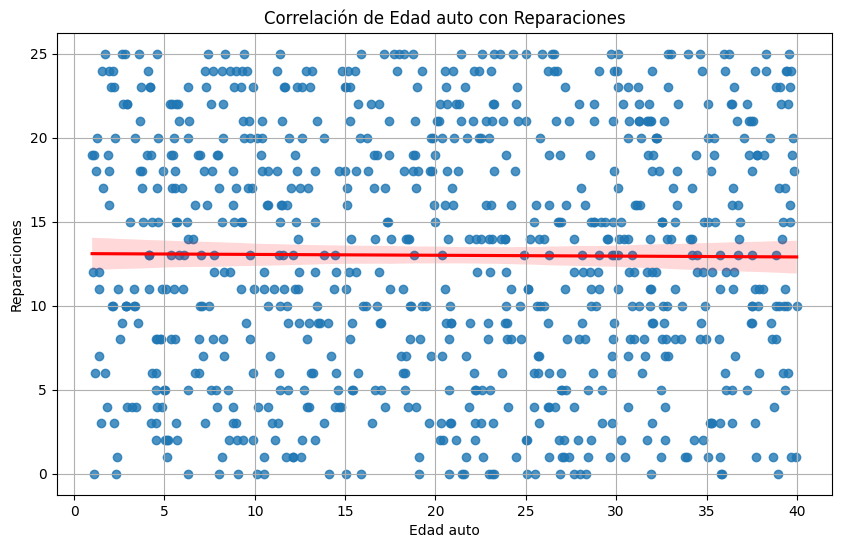

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

x = 'edad_auto'
y = 'reparaciones'

df_clasicos = df[df['tipo'].isin([0])]

df_clasicos

plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, data=df_clasicos, line_kws={'color':'red'})
plt.title(f'Correlación de {x.replace("_", " ").capitalize()} con {y.replace("_", " ").capitalize()}')
plt.xlabel(x.replace("_", " ").capitalize())
plt.ylabel(y.replace("_", " ").capitalize())
plt.grid(True)
plt.show()

In [11]:
from scipy.stats import pearsonr



pearson_corr, pearson_p_value = pearsonr(df_clasicos[x], df_clasicos[y])

print(f"Correlacion de Pearson: {pearson_corr}, p-value: {(np.round(pearson_p_value,6))}")

# < 0,05 Correlacion significativa
# < 0,01 Correlacion es muy significativa


0.09

Correlacion de Pearson: -0.007617713069493719, p-value: 0.828307


0.09

In [12]:
mean = df_clasicos['edad_auto'].mean()
std = df_clasicos['edad_auto'].std()

print(f"Edad auto: media: {mean}, std: {std} ")

Edad auto: media: 20.534870848708486, std: 11.331958041029107 


In [13]:
20.53 + 11.33*-1.215

6.764050000000001

In [14]:
df_clasicos

def calcular_z_score(columna):
    media = columna.mean()
    std = columna.std()
    return columna.apply(lambda x: (x - media) / std)

df['z_score_edad_auto'] = calcular_z_score(df['edad_auto'])
df['z_score_edad_vendedor'] = calcular_z_score(df['edad_vendedor'])
df

,edad_vendedor,edad_auto,km_recorridos,reparaciones,tipo,precio,z_score_edad_auto,z_score_edad_vendedor
0,23,2.17,25143.0,24,0,4077,-1.633090,-1.372656
1,26,18.92,120165.0,17,0,2804,-0.148837,-1.194789
2,35,24.90,90244.0,13,0,4432,0.381063,-0.661189
3,34,1.93,15384.0,18,0,5340,-1.654357,-0.720478
4,67,6.88,32319.0,19,0,4053,-1.215727,1.236054
...,...,...,...,...,...,...,...,...
995,50,20.87,79053.0,0,1,4394,0.023956,0.228144
996,32,4.29,33727.0,15,0,5408,-1.445232,-0.839056
997,62,12.43,30398.0,9,0,6426,-0.723930,0.939610
998,65,28.53,174801.0,19,0,747,0.702725,1.117476
